In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\abhis\Downloads\emails.csv")

In [4]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
x = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

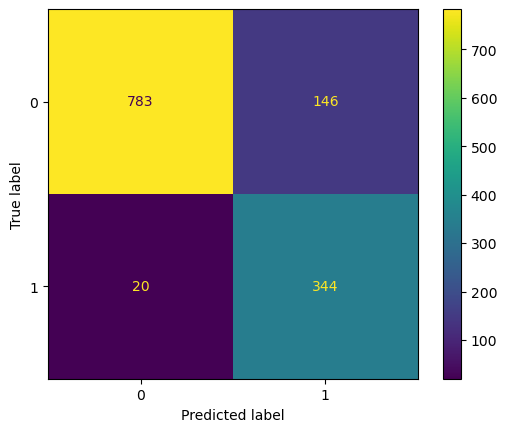

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [12]:
accuracy_score(y_test, y_pred)

0.871616395978345

In [13]:
import numpy as nm
errors = []
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    errors.append(nm.mean(pred != y_test))
errors

[0.10827532869296211,
 0.10982211910286156,
 0.12296983758700696,
 0.11523588553750967,
 0.12838360402165508,
 0.1214230471771075,
 0.15158546017014696,
 0.14849187935034802,
 0.17246713070378963,
 0.16705336426914152,
 0.1871616395978345,
 0.18329466357308585,
 0.21500386697602475,
 0.21345707656612528,
 0.22815158546017014,
 0.2266047950502707,
 0.23588553750966745,
 0.23356535189481825,
 0.2459396751740139,
 0.24361948955916474,
 0.2559938128383604,
 0.2552204176334107,
 0.2699149265274555,
 0.2691415313225058,
 0.2822892498066512,
 0.28306264501160094,
 0.2954369682907966,
 0.2923433874709977,
 0.3039443155452436,
 0.300077339520495,
 0.30549110595514306,
 0.30549110595514306,
 0.31245166279969067,
 0.31245166279969067,
 0.3194122196442382,
 0.317092034029389,
 0.32637277648878577,
 0.32559938128383603,
 0.33410672853828305,
 0.3325599381283836]

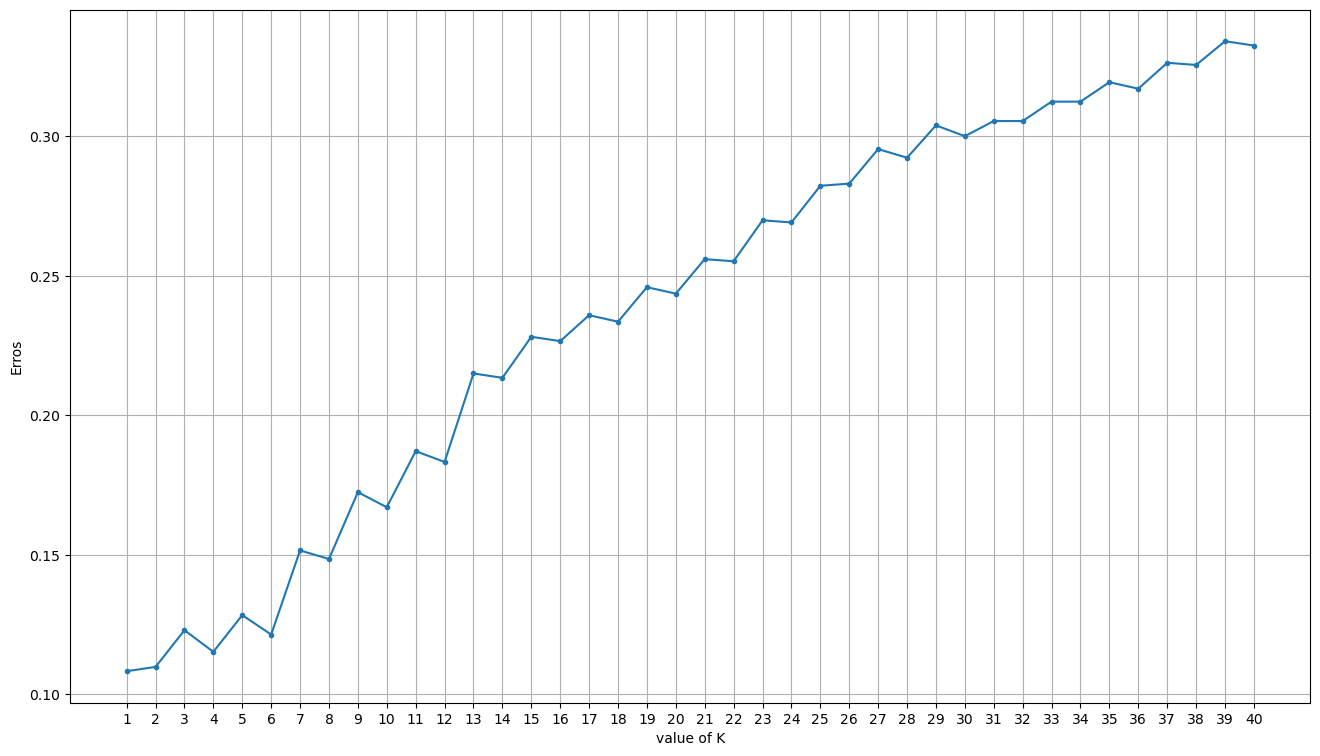

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 9))
plt.xlabel("value of K")
plt.ylabel("Erros")
plt.grid()
plt.xticks(range(1, 41))
plt.plot(range(1, 41), errors, marker= '.')

In [15]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.8917246713070379

In [16]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear")
svm.fit(x_test, y_test)
y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred)

0.9922660479505027

In [17]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)